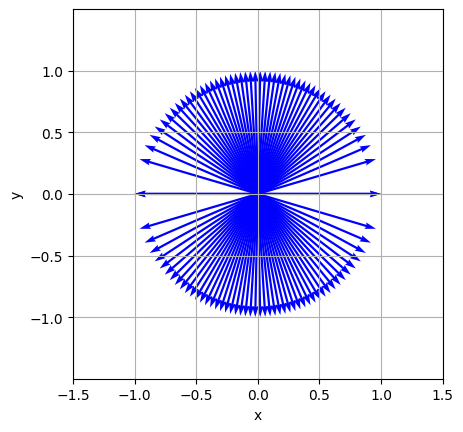

In [1]:
from utils import plot_vectors, generate_vector_space
from matplotlib import pyplot as plt
import numpy as np

# Create Unit Circle with vectors
fig, ax = plt.subplots()
vector_space = generate_vector_space(50)
plot_vectors(vector_space,ax=ax)
plt.show()



Each row in `vector_space` is a vector. Now we want to find space of `Ax` where `A` is a matrix. Ax_space will have shape (number_of_points,2) each row is a vector in the space of `Ax_i`. Rather than multiplying one by one we can use `np.matmul` to multiply all rows at once.

In [2]:
A = np.array([[1, 2], [3, 4]])
# A has shape (2,2) , vector_space has shape (100,2)
Ax_space = np.matmul(A,vector_space.T).T

The crucial point is to understand why we transpose vector space. Let me explain from the scratch. In multiplying matrix A with B to get Z. I mean Z = AB. Z's first column is equal to matrix-vector product of A with B's first column. We want to do matrix-vector product of A with all vectors in the `vector_space`. So we converted each row(each vector) in `vector_space` to column and then we did matrix-vector product of A with each column. Finally we need to do transpose to get vectors in rows of `Ax_space`

In [3]:
assert np.array_equal(Ax_space[2,:], np.matmul(A,vector_space[2,:]))

Let's find eigenvectors and eigenvalues of A matrix

In [4]:
from numpy import linalg as LA
eig_values, eig_vectors = LA.eig(A)
print(eig_values)
print(eig_vectors)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


Each column of `eig_vectors` is an eigenvector of A and each element of `eig_values` is an eigenvalue of A. Now let's add eigenvalues to vector_space and plot with different colors

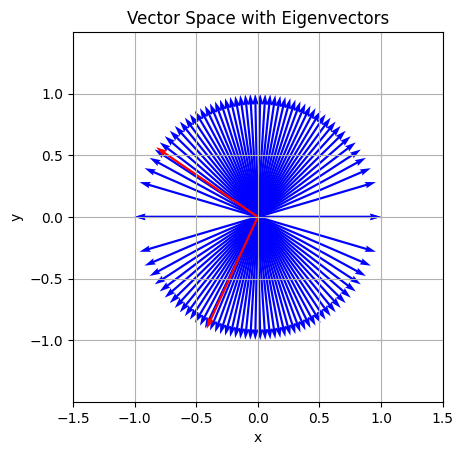

In [5]:
vector_space_with_eigenvectors = np.vstack((vector_space, eig_vectors.T))
fig,ax = plt.subplots()
colors = ["blue" for _ in range(vector_space.shape[0])]+["red" for _ in range(eig_vectors.shape[1])]
plot_vectors(vector_space_with_eigenvectors,ax=ax,colors=colors,title="Vector Space with Eigenvectors")
plt.show()

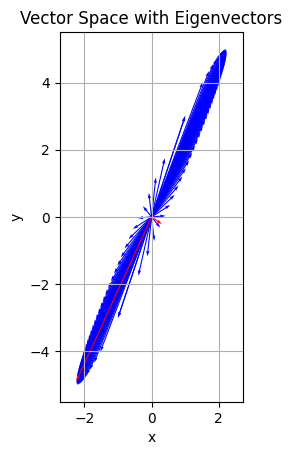

In [6]:
import numpy as np
Ax_space_with_eigenvectors = np.matmul(A,vector_space_with_eigenvectors.T).T
fig,ax = plt.subplots()
colors = ["blue" for _ in range(vector_space.shape[0])]+["red" for _ in range(eig_vectors.shape[1])]
plot_vectors(Ax_space_with_eigenvectors,ax=ax,colors=colors,title="Vector Space with Eigenvectors")
plt.show()

Let's review eigendecomposition part by part

$\mathbf{A} = \mathbf{PDP}^{-1}$ where $\mathbf{P}$ is the matrix of eigenvectors and $\mathbf{D}$ is the diagonal matrix of eigenvalues. If we multiply A with a vector $\mathbf{v}$, we get $\mathbf{PDP}^{-1}v$. So we are first multiplying $\mathbf{v}$ with $\mathbf{P}^{-1}$, then with $\mathbf{D}$, then with $\mathbf{P}$. Let's see how vector space changes when we multiply with these matrices.

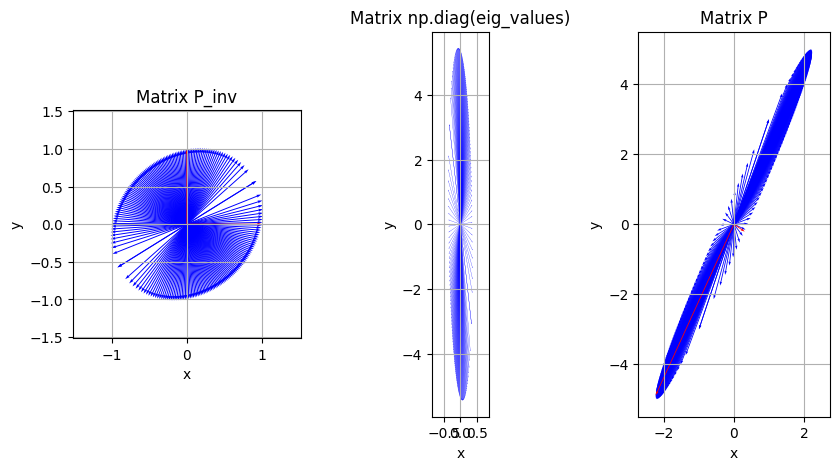

In [7]:
from utils import multiply_and_plot_vector_space,generate_vector_space_with_eigenvectors_appended
vector_space = generate_vector_space_with_eigenvectors_appended(100,A)
P = eig_vectors
P_inv = np.linalg.inv(P)

matrices = [P_inv,np.diag(eig_values),P]
matrices_labels = ["P_inv","np.diag(eig_values)","P"]

fig,axes = plt.subplots(1,3,figsize=(10,5))
colors = ["blue" for _ in range(200)]+["red" for _ in range(2)]

for i,ax in enumerate(axes):
    vector_space = multiply_and_plot_vector_space(matrices[i],vector_space,ax,colors=colors,title=f"Matrix {matrices_labels[i]}")

plt.show()


As you can understand from the picture, P_inv rotated the eigenvectors so that they will be standard basis vectors. Then with eigenvalues, P_inv scaled the eigenvectors. Then with P, the eigenvectors rotated again. 

Another observation is the area of the ellipsoid is pi * a * b, here a = lambda_1 and b = lambda_2 -- eigenvalues
our very initial vector space is a unit circle, so the area is pi * 1 * 1 = pi
now we have an ellipsoid, so the area is pi * lambda_1 * lambda_2

**If you divide the area of the ellipsoid by the area of the unit circle, you get lambda_1 * lambda_2 which is the determinant of the matrix A**

Let's inspect all these transformations for 
1- Singular Matrix
2- Symmetric Matrix
3- Positive Definite Matrix
4- Negative Definite Matrix

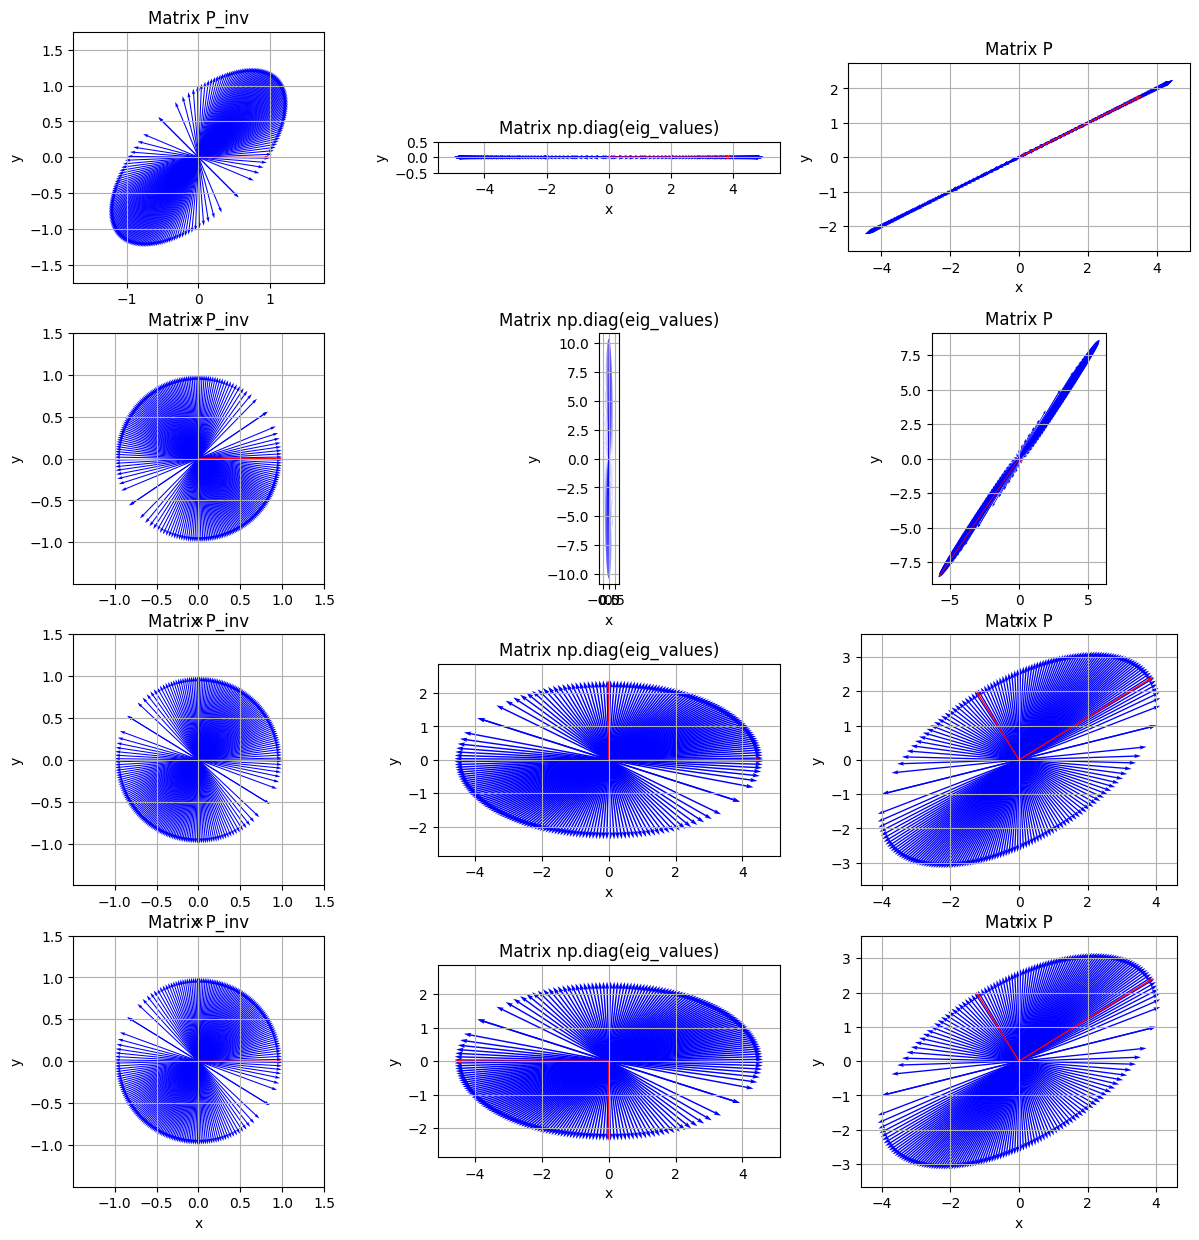

In [ ]:
from utils import plot_eigendecomposition_matrix
singular_matrix = np.array([[2, 4],
                           [1, 2]])

symmetric_matrix = np.array([[3, 5],
                            [5, 7]])

positive_definite_matrix = np.array([[4, 1],
                                    [1, 3]])

negative_definite_matrix = np.array([[-4, -1],
                                    [-1, -3]])


fig,axes = plt.subplots(4,3, figsize=(15,15))

plot_eigendecomposition_matrix(singular_matrix,axes[0,:],"singular_matrix")
plot_eigendecomposition_matrix(symmetric_matrix,axes[1,:],"symmetric_matrix")
plot_eigendecomposition_matrix(positive_definite_matrix,axes[2,:],"positive_definite_matrix")
plot_eigendecomposition_matrix(negative_definite_matrix,axes[3,:],"negative_definite_matrix")         

The range of singular vector is just line along eigenvector ??